# Social Media Sentiment Analysis Model

## A. Summary and How To Use

This model main goal is to analyze comment section from YouTube and classify it to Negative or Non-Negative (Neutral and Positive) Comment in order to give insight to user. By using the model, we hope we can help user to manage its content 

## B. How to Make the Model?

### i. Data Pre-processing

1. Load the dataset from the dataset folder from **"two_dataset.csv"** using pandas.
2. Perform data cleaning as the dataset its not clean
3. We clean data from number, punctuation, and whitespace
4. Separate/select the label, and the feature. The feature is a column with name `text` and the label is a column with name `label`.
5. Perform one-hot encoding in `label` column


### ii. Data Preparation for Modelling

1. Dataset tokenization with 4000 vocabulary size for feature.
2. Convert the text data into sequences and pad the sequences 
3. Split the feature and the label (X and y) into 2 different usage. In this scoop, feature and label are divided as the train set and test set with the proportion of 90% train set, and the 10% as the test set.


### iii. Modelling Process

1. Define the model. In this scoop, the model uses:
  - 1 layer of Keras Embedding layer,
  - 3 layers of Keras Bidirectional with LSTM layer,
  - 1 layer of Keras Dense layer,
  - 1 layer of Keras Dropout layer
  - 1 layers of Keras Dense layer as an output.

 The activation function used in the model is `ReLu` for the first layer of Keras Dense layer, as the `ReLU` activation function is one of the best activation function. And the activation function for the last Keras Dense layer is different (`sigmoid`) is used to do binary-class classification.

2. Compile the model. The loss function used in this model is the `binary_crossentropy` (this loss is optimized for binary-class classification). To fit this model better, the "Adaptive Moment Estimation" (`Adam`) is used for optimization and `accuracy` as the metric.

3. Fit the model with the epoch of 20 and test set as validation data.

### iv. Evaluation

1. Plot the accuracy of the model in the epoch. The plot is for accuracy of both the train set and the test set. After plotting, check the graph. Does the accuracy continue to increase or keep decreasing? If it continues to increase, then the model is well-fit.

2. Plot the loss of the model in the epoch. As the opposite of accuracy, the plot is for loss of both the train set and the test set should decrease in each epoch. After plotting, check the graph. Does the loss continue to decrease or keep increasing? If it continues to decrease, then the model is well-fit.

### v. Save the model and tokenizer

1. Save the best model into .hdf5 for retraining or just to load and make some predictions with the model.

2. Save the tokenization object for future data preparation needs.

## C. Data Processing
As the data from the dataset is the raw data, we need to process the data first before it is able to be used well. To get the best model, we need to supply it with the best processed data, not a raw data.

### 1. Load Library Needed to Create Model
Load the libraries needed by using import. The libraries needed are:

* Pandas
* TensoFlow
* Matplotlib
* Sklearn
* Numpy

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, Bidirectional, LSTM

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

### 2. Load the dataset and perform cleaning data
Load the dataset from the file "two_dataset.csv" and perform cleaning for each row on the dataset. We do lowercase, removing digits, removing punctuation, and removing whitespace

In [2]:
df = pd.read_csv("two_dataset.csv",on_bad_lines='skip')
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace('\d+', '', regex=True)
df['text'] = df['text'].str.replace(r'[^\w\s]+', '', regex=True)
df['text'] = df['text'].str.replace('  ', ' ')

### 3. Check for missing values
Since there are no missing value in the dataset, there is no need to fix it

In [3]:
df.isna().sum()

text     0
label    0
dtype: int64

### 4. Split dataset and perform one-hot encoding
Dataset is splitted into X or txt and y or the label itself. this action is to process the txt data with tokenizer so machine can learn the data

In [4]:
txt = df['text'].to_list()
y= df['label']
y= to_categorical(y)
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

## D. Modelling Preparation

### 1. Create Tokenizer
Tokenizer is used to breaking down a sequence of text, such as a sentence or a document, into smaller units called tokens. Each token represents a meaningful unit of text, which can be a word, a character, or a subword.

In [5]:
embedding_dim = 100
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [6]:
token= Tokenizer(oov_token=oov_tok)
token.fit_on_texts(txt)
token.index_word

{1: '<OOV>',
 2: 'yang',
 3: 'di',
 4: 'dan',
 5: 'tidak',
 6: 'saya',
 7: 'dengan',
 8: 'ini',
 9: 'untuk',
 10: 'enak',
 11: 'makan',
 12: 'ke',
 13: 'makanan',
 14: 'tempat',
 15: 'juga',
 16: 'ada',
 17: 'sangat',
 18: 'dari',
 19: 'banyak',
 20: 'sudah',
 21: 'sini',
 22: 'kami',
 23: 'karena',
 24: 'bisa',
 25: 'cukup',
 26: 'tapi',
 27: 'saja',
 28: 'banget',
 29: 'itu',
 30: 'menu',
 31: 'kalau',
 32: 'harga',
 33: 'rasa',
 34: 'tempatnya',
 35: 'sama',
 36: 'rasanya',
 37: 'restoran',
 38: 'malam',
 39: 'makanannya',
 40: 'nyaman',
 41: 'buat',
 42: 'jadi',
 43: 'sekali',
 44: 'orang',
 45: 'lagi',
 46: 'mahal',
 47: 'hari',
 48: 'mau',
 49: 'harganya',
 50: 'bagus',
 51: 'lebih',
 52: 'datang',
 53: 'sampai',
 54: 'pemandangan',
 55: 'resto',
 56: 'saat',
 57: 'suka',
 58: 'keluarga',
 59: 'hanya',
 60: 'pelayanan',
 61: 'ya',
 62: 'suasana',
 63: 'ayam',
 64: 'pilihan',
 65: 'pas',
 66: 'kota',
 67: 'goreng',
 68: 'terlalu',
 69: 'pun',
 70: 'kita',
 71: 'bandung',
 72: 'ada

In [7]:
voc = len(token.index_word)+1
voc

4271

### 2. Convert texts to sequence and pad sequences

In [8]:
encoded = token.texts_to_sequences(txt)
X = pad_sequences(encoded, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X

array([[1189, 1190,  258, ...,    0,    0,    0],
       [1191,    2,  136, ...,    0,    0,    0],
       [ 481,  141,  549, ...,    0,    0,    0],
       ...,
       [ 150,   12,   21, ...,    0,    0,    0],
       [  34,  255,   99, ...,    0,    0,    0],
       [1468,    8,   20, ...,    0,    0,    0]])

### 3. Split the feature and label dataset

Split the feature and the label (X and y) into 2 different usage. In this scoop, the feature is divided as the train set and test set with the proportion of 90% train set, and the 10% as the test set.

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, random_state = 505, stratify=y )

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)

## E. Modelling Process

1. Define the model. In this scoop, the model uses:
  - 1 layer of Keras Embedding layer,
  - 3 layers of Keras Bidirectional with LSTM layer,
  - 1 layer of Keras Dense layer,
  - 1 layer of Keras Dropout layer
  - 1 layers of Keras Dense layer as an output.

 The activation function used in the model is `ReLu` for the first layer of Keras Dense layer, as the `ReLU` activation function is one of the best activation function. And the activation function for the last Keras Dense layer is different (`sigmoid`) is used to do binary-class classification.

2. Compile the model. The loss function used in this model is the `binary_crossentropy` (this loss is optimized for binary-class classification). To fit this model better, the "Adaptive Moment Estimation" (`Adam`) is used for optimization and `accuracy` as the metric.

3. Fit the model with the epoch of 20 and test set as validation data.

In [10]:
model = Sequential()
model.add(Embedding(voc, embedding_dim, input_length=max_length, mask_zero=True))
model.add(Bidirectional(LSTM(64, 
                        dropout=0.5, 
                        recurrent_dropout=0.5, 
                        return_sequences=True)))
model.add(Bidirectional(LSTM(32, 
                        dropout=0.5, 
                        recurrent_dropout=0.5, 
                        return_sequences=True)))
model.add(Bidirectional(LSTM(16, 
                        dropout=0.5, 
                        recurrent_dropout=0.5,
                        
                        )))


model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 100)          427100    
                                                                 
 bidirectional (Bidirectiona  (None, 120, 128)         84480     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 120, 64)          41216     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                        

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
num_epochs=7
fit_history = model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test))

Epoch 1/7
29/29 [==============================] - 31s 470ms/step - loss: 1.0324 - accuracy: 0.6189 - val_loss: 0.9319 - val_accuracy: 0.6200
Epoch 2/7
29/29 [==============================] - 13s 435ms/step - loss: 0.7646 - accuracy: 0.7867 - val_loss: 0.7092 - val_accuracy: 0.8100
Epoch 3/7
29/29 [==============================] - 13s 456ms/step - loss: 0.4612 - accuracy: 0.9344 - val_loss: 0.5856 - val_accuracy: 0.8500
Epoch 4/7
29/29 [==============================] - 15s 525ms/step - loss: 0.2860 - accuracy: 0.9733 - val_loss: 0.7383 - val_accuracy: 0.8100
Epoch 5/7
29/29 [==============================] - 17s 596ms/step - loss: 0.2299 - accuracy: 0.9767 - val_loss: 0.7323 - val_accuracy: 0.8200
Epoch 6/7
29/29 [==============================] - 16s 544ms/step - loss: 0.1356 - accuracy: 0.9956 - val_loss: 0.7607 - val_accuracy: 0.8500
Epoch 7/7
29/29 [==============================] - 17s 600ms/step - loss: 0.1009 - accuracy: 0.9967 - val_loss: 0.7824 - val_accuracy: 0.8500


In [13]:
loss, acc = model.evaluate(X_test, Y_test)
print(f"Loss is {loss}\nAccuracy is {acc}")

4/4 [==============================] - 0s 91ms/step - loss: 0.7824 - accuracy: 0.8500
Loss is 0.7823734879493713
Accuracy is 0.8500000238418579


## F. Evaluating

The evaluation process is the last process in this document. This evaluation process aims to evaluate how the model works, and how the model converges through each epoch. There are to graphs going to be made, the accuracy plot, and the loss plot.

### i. Accuracy Plotting
Plot the accuracy of the model in the epoch. The plot is for accuracy of both the train set and the test set. After plotting, check the graph. Does the accuracy continue to increase or keep decreasing? If it continues to increase, then the model is well-fit.

In this case, the graph shows that the accuracy is increasing in both train and test set. This means that the model is well-fit.

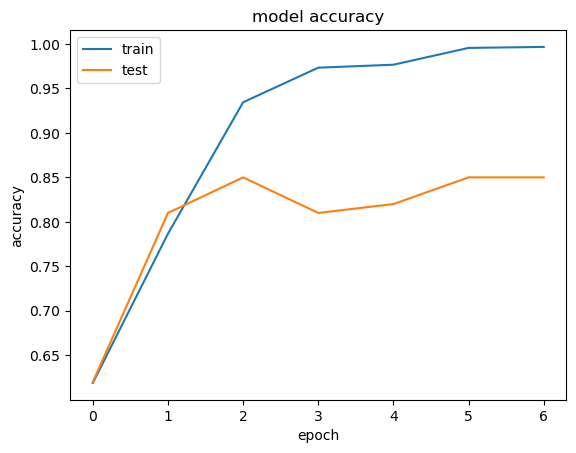

In [14]:
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### ii. Loss Plotting

Plot the loss of the model in the epoch. As the opposite of accuracy, the plot is for loss of both the train set and the test set should decrease in each epoch. After plotting, check the graph. Does the loss continue to decrease or keep increasing? If it continues to decrease, then the model is well-fit.

In this case, the graph shows that the loss is decreasing in both train and test set. This means that the model is well-fit.

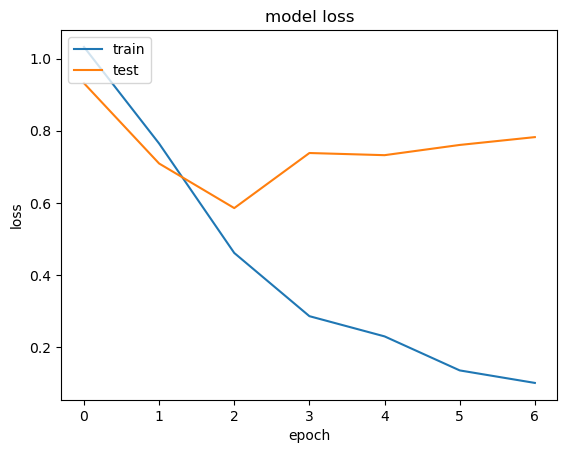

In [15]:
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## G. Save the model and tokenizer

1. Save the best model into .hdf5 for retraining or just to load and make some predictions with the model.

2. Save the tokenization object for future data preparation needs.

In [16]:
model.save("model_fix.h5")

In [17]:
import joblib
joblib.dump(token, 'token.pkl')

['token.pkl']

## H. Example Section
This section is used if you just want predict the data. you have to turn your input e.g. sentence into sequences. Now you can make predictions about the sentiment of a given sentence and obtain the results as a list of vectors containing [0,1] or [1,0]. The value [0,1] indicates a positive sentiment for the sentence, while the value [1,0] represents a negative sentiment. 

In [18]:
def get_encoded(x):
    encode = token.texts_to_sequences(x)
    seq = pad_sequences(encode, maxlen=max_length, padding='post', truncating='post')
    return seq

In [19]:
sample = ['saya marah sekali', 'makanan ini enak', 'wah kamu baik sekali']

In [20]:
a = get_encoded(sample)

In [21]:
predictions = (model.predict(a) > 0.5).astype("int32")

1/1 [==============================] - 5s 5s/step


In [22]:
predictions

array([[1, 0],
       [0, 1],
       [0, 1]])